In [1]:
#Problem Statement

In [2]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart_2020.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
# checking the shape of dataframe 

df.shape

(319795, 18)

In [5]:
# observing the dataframe for the first time

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
### Data Preperation and EDA


In [7]:
# checking the missing values now 

round(df.isnull().sum()/len(df.index),2)

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [8]:
# Finding highly skewed columns
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [11]:
df['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [12]:
df['AlcoholDrinking'].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [13]:
df['Stroke'].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [14]:
# # dropping 'Stroke'
# df.drop('Stroke', axis =1 , inplace = True)

In [15]:
df['DiffWalking'].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [16]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [17]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [18]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [19]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [20]:
df['PhysicalActivity'].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [21]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [22]:
df['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [23]:
df['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [24]:
df['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [25]:
df.shape

(319795, 18)

In [26]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [27]:
#Creating Dummiesss

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [29]:
# creating a function to clearly mention the yes and its related variable

def heartD(x):
    if x == 'Yes':
        return 'yes_HeartD'
    else:
        return 'no_HeartD'

In [30]:
 df['HeartDisease'] = df['HeartDisease'].apply(heartD)

In [31]:
# Variable One: HeartDisease
HeartDisease_dummy = pd.get_dummies(df['HeartDisease'], drop_first = True)
HeartDisease_dummy.head()

,yes_HeartD
0,0
1,0
2,0
3,0
4,0


In [32]:
# creating a function to clearly mention the yes and its related variable

def smoking(x):
    if x == 'Yes':
        return 'yes_Smoking'
    else:
        return 'no_Smoking'

In [33]:
 df['Smoking'] = df['Smoking'].apply(smoking)

In [34]:
# Variable Two: Smoking
Smoking_dummy = pd.get_dummies(df['Smoking'], drop_first = True)
Smoking_dummy.head()

,yes_Smoking
0,1
1,0
2,1
3,0
4,0


In [35]:
def alcohol_drinking(x):
    if x == 'Yes':
        return 'yes_AlcoholDrinking'
    else:
        return 'no_AlcoholDrinking'

In [36]:
 df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(alcohol_drinking)

In [37]:
# Variable Three: AlcoholDrinking
AlcoholDrinking_dummy = pd.get_dummies(df['AlcoholDrinking'], drop_first = True)
AlcoholDrinking_dummy.head()

,yes_AlcoholDrinking
0,0
1,0
2,0
3,0
4,0


In [38]:
def diffWalking(x):
    if x == 'Yes':
        return 'yes_DiffWalking'
    else:
        return 'no_DiffWalking'

In [39]:
 df['DiffWalking'] = df['DiffWalking'].apply(diffWalking)

In [40]:
# Variable Four: DiffWalking
DiffWalking_dummy = pd.get_dummies(df['DiffWalking'], drop_first = True)
DiffWalking_dummy.head()

,yes_DiffWalking
0,0
1,0
2,0
3,0
4,1


In [41]:
# Variable Five: Sex
Sex_dummy = pd.get_dummies(df['Sex'], drop_first = True)
Sex_dummy.head()

,Male
0,0
1,0
2,1
3,0
4,0


In [42]:
# Variable Six: AgeCategory
AgeCategory_dummy = pd.get_dummies(df['AgeCategory'], drop_first = True)
AgeCategory_dummy.head()

,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [43]:
# Variable Seven: Race
Race_dummy = pd.get_dummies(df['Race'], drop_first = True)
Race_dummy.head()

,Asian,Black,Hispanic,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [44]:
def diabetic(x):
    if x == 'Yes':
        return 'yes_Diabetic'

    else:
        return x

In [45]:
 df['Diabetic'] = df['Diabetic'].apply(diabetic)

In [46]:
# Variable Eight: Diabetic 
Diabetic_dummy = pd.get_dummies(df['Diabetic'], drop_first = True)
Diabetic_dummy.head()

,"No, borderline diabetes",Yes (during pregnancy),yes_Diabetic
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [47]:
def physicalactivity(x):
    if x == 'Yes':
        return 'yes_PhysicalActivity'

    else:
        return 'no_PhysicalActivity'

In [48]:
 df['PhysicalActivity'] = df['PhysicalActivity'].apply(physicalactivity)

In [49]:
# Variable Nine: PhysicalActivity
PhysicalActivity_dummy = pd.get_dummies(df['PhysicalActivity'], drop_first = True)
PhysicalActivity_dummy.head()

,yes_PhysicalActivity
0,1
1,1
2,1
3,0
4,1


In [50]:
# Variable Ten: GenHealth
GenHealth_dummy = pd.get_dummies(df['GenHealth'], drop_first = True)
GenHealth_dummy.head()

,Fair,Good,Poor,Very good
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [51]:
def asthma(x):
    if x == 'Yes':
        return 'yes_Asthma'

    else:
        return 'no_Asthma'

In [52]:
 df['Asthma'] = df['Asthma'].apply(asthma)

In [53]:
# Variable Eleven: Asthma
Asthma_dummy = pd.get_dummies(df['Asthma'], drop_first = True)
Asthma_dummy.head()

,yes_Asthma
0,1
1,0
2,1
3,0
4,0


In [54]:
def kidneydisease(x):
    if x == 'Yes':
        return 'yes_KidneyDisease'

    else:
        return 'no_KidneyDisease'

In [55]:
 df['KidneyDisease'] = df['KidneyDisease'].apply(kidneydisease)

In [56]:
# Variable Tweleve: KidneyDisease
KidneyDisease_dummy = pd.get_dummies(df['KidneyDisease'], drop_first = True)
KidneyDisease_dummy.head()

,yes_KidneyDisease
0,0
1,0
2,0
3,0
4,0


In [57]:
def skincancer(x):
    if x == 'Yes':
        return 'yes_SkinCancer'

    else:
        return 'no_SkinCancer'

In [58]:
 df['SkinCancer'] = df['SkinCancer'].apply(skincancer)

In [59]:
# Variable Thirteen: SkinCancer
SkinCancer_dummy = pd.get_dummies(df['SkinCancer'], drop_first = True)
SkinCancer_dummy.head()

,yes_SkinCancer
0,1
1,0
2,0
3,1
4,0


In [60]:
def stroke(x):
    if x == 'Yes':
        return 'yes_Stroke'

    else:
        return 'no_Stroke'

In [61]:
 df['Stroke'] = df['Stroke'].apply(stroke)

In [62]:
# Variable Fourteen: Stroke
Stroke_dummy = pd.get_dummies(df['Stroke'], drop_first = True)
Stroke_dummy.head()

,yes_Stroke
0,0
1,1
2,0
3,0
4,0


In [63]:
#### Putting all the dummy dataframe together 

final = pd.concat([df,HeartDisease_dummy, Smoking_dummy,AlcoholDrinking_dummy,DiffWalking_dummy,Sex_dummy, AgeCategory_dummy,Race_dummy,Diabetic_dummy,PhysicalActivity_dummy,GenHealth_dummy,Asthma_dummy, KidneyDisease_dummy, SkinCancer_dummy, Stroke_dummy],axis =1)
final.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,yes_Diabetic,yes_PhysicalActivity,Fair,Good,Poor,Very good,yes_Asthma,yes_KidneyDisease,yes_SkinCancer,yes_Stroke
0,no_HeartD,16.60,yes_Smoking,no_AlcoholDrinking,no_Stroke,3.0,30.0,no_DiffWalking,Female,55-59,...,1,1,0,0,0,1,1,0,1,0
1,no_HeartD,20.34,no_Smoking,no_AlcoholDrinking,yes_Stroke,0.0,0.0,no_DiffWalking,Female,80 or older,...,0,1,0,0,0,1,0,0,0,1
2,no_HeartD,26.58,yes_Smoking,no_AlcoholDrinking,no_Stroke,20.0,30.0,no_DiffWalking,Male,65-69,...,1,1,1,0,0,0,1,0,0,0
3,no_HeartD,24.21,no_Smoking,no_AlcoholDrinking,no_Stroke,0.0,0.0,no_DiffWalking,Female,75-79,...,0,0,0,1,0,0,0,0,1,0
4,no_HeartD,23.71,no_Smoking,no_AlcoholDrinking,no_Stroke,28.0,0.0,yes_DiffWalking,Female,40-44,...,0,1,0,0,0,1,0,0,0,0


In [64]:
# dropping all the related variables after creating the dummies 

final = final.drop('Smoking',axis =1)
final = final.drop('AlcoholDrinking',axis =1)
final = final.drop('DiffWalking',axis =1)
final = final.drop('Sex',axis =1)
final = final.drop('AgeCategory',axis =1)
final = final.drop('Race',axis =1)
final = final.drop('Diabetic',axis =1)
final = final.drop('PhysicalActivity',axis =1)
final = final.drop('GenHealth',axis =1)
final = final.drop('Asthma',axis =1)
final = final.drop('KidneyDisease',axis =1)
final = final.drop('SkinCancer',axis =1)
final = final.drop('Stroke',axis =1)

In [65]:
final = final.drop('HeartDisease',axis =1)

In [66]:
final.shape

(319795, 38)

In [67]:
final.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,yes_HeartD,yes_Smoking,yes_AlcoholDrinking,yes_DiffWalking,Male,25-29,...,yes_Diabetic,yes_PhysicalActivity,Fair,Good,Poor,Very good,yes_Asthma,yes_KidneyDisease,yes_SkinCancer,yes_Stroke
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,1,0,0,0,1,1,0,1,0
1,20.34,0.0,0.0,7.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,26.58,20.0,30.0,8.0,0,1,0,0,1,0,...,1,1,1,0,0,0,1,0,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,23.71,28.0,0.0,8.0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [68]:
# Dividing int train and test sets

In [69]:
# importing relevant libraries 

import sklearn
from sklearn.model_selection import train_test_split

In [70]:
final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)

print(final_train.shape)
print(final_test.shape)

(223856, 38)
(95939, 38)


In [71]:
# Performing scaling on continuous variables 

In [72]:
#importing relevant packages 

from sklearn.preprocessing import MinMaxScaler

In [73]:
# Instiating scaler object 

scaler = MinMaxScaler()

In [74]:
# creating a list of numeric variables 

numeric = ['BMI','PhysicalHealth','MentalHealth','SleepTime']

In [75]:
final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [76]:
final_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,yes_HeartD,yes_Smoking,yes_AlcoholDrinking,yes_DiffWalking,Male,25-29,...,yes_Diabetic,yes_PhysicalActivity,Fair,Good,Poor,Very good,yes_Asthma,yes_KidneyDisease,yes_SkinCancer,yes_Stroke
148821,0.157914,0.0,0.0,0.260870,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
113787,0.132923,0.0,0.0,0.260870,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
114251,0.182905,0.0,0.0,0.173913,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
311048,0.136545,0.0,0.0,0.260870,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
50914,0.203670,0.0,0.0,0.304348,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [77]:
## Creating the test train split 


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x = final.drop(['yes_HeartD'], axis =1)

In [80]:
x.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,yes_Smoking,yes_AlcoholDrinking,yes_DiffWalking,Male,25-29,30-34,...,yes_Diabetic,yes_PhysicalActivity,Fair,Good,Poor,Very good,yes_Asthma,yes_KidneyDisease,yes_SkinCancer,yes_Stroke
0,16.60,3.0,30.0,5.0,1,0,0,0,0,0,...,1,1,0,0,0,1,1,0,1,0
1,20.34,0.0,0.0,7.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,26.58,20.0,30.0,8.0,1,0,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,23.71,28.0,0.0,8.0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [81]:
y = final['yes_HeartD']

In [82]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: yes_HeartD, dtype: uint8

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [84]:
# # calculating the conversion rate
conversion = sum(final['yes_HeartD'])/len(final['yes_HeartD'].index)
conversion

0.08559545959130067

In [85]:
## Building the first model

In [86]:
import statsmodels.api as sm

In [87]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             yes_HeartD   No. Observations:               223856
Model:                            GLM   Df Residuals:                   223818
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50646.
Date:                Tue, 15 Aug 2023   Deviance:                   1.0129e+05
Time:                        02:00:05   Pearson chi2:                 2.12e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1222
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.3067      0.139    -45.504      0.000      -6.578      -6.035
BMI                         0.0087      0.001      6.351      0.000       0.006       0.011
PhysicalHealth              0.0020      0.001      1.898      0.058   -6.39e-05       0.004
MentalHealth                0.0041      0.001      3.900      0.000       0.002       0.006
SleepTime                  -0.0331      0.005     -6.334      0.000      -0.043      -0.023
yes_Smoking                 0.3682      0.017     21.393      0.000       0.334       0.402
yes_AlcoholDrinking        -0.2243      0.040     -5.593      0.000      -0.303      -0.146
yes_DiffWalking             0.1989      0.022      9.146      0.000       0.156       0.242
Male                        0.7046      0.017     40.416      0.000       0.670       0.739
25-29                       0.1279      0.149      0.857      0.392      -0.165       0.421
30-34                       0.4788      0.134      3.563      0.000       0.215       0.742
35-39                       0.5730      0.128      4.462      0.000       0.321       0.825
40-44                       0.9647      0.121      7.960      0.000       0.727       1.202
45-49                       1.3375      0.116     11.497      0.000       1.109       1.566
50-54                       1.7584      0.112     15.645      0.000       1.538       1.979
55-59                       1.9545      0.111     17.640      0.000       1.737       2.172
60-64                       2.2531      0.110     20.533      0.000       2.038       2.468
65-69                       2.4710      0.109     22.576      0.000       2.257       2.686
70-74                       2.7650      0.109     25.283      0.000       2.551       2.979
75-79                       2.9654      0.110     26.960      0.000       2.750       3.181
80 or older                 3.2237      0.110     29.387      0.000       3.009       3.439
Asian                      -0.4801      0.101     -4.758      0.000      -0.678      -0.282
Black                      -0.3161      0.070     -4.531      0.000      -0.453      -0.179
Hispanic                   -0.2034      0.071     -2.866      0.004      -0.343      -0.064
Other                      -0.0086      0.077     -0.111      0.911      -0.160       0.142
White                      -0.0259      0.062     -0.416      0.677      -0.148       0.096
No, borderline diabetes     0.1357      0.050      2.710      0.007       0.038       0.234
Yes (during pregnancy)     -0.0184      0.135     -0.137      0.891      -0.283       0.246
yes_Diabetic                0.4831      0.020     24.148      0.000       0.444       0.522
yes_PhysicalActivity        0.0254      0.019      1.319      0.187      -0.012       0.063
Fair                        1.5466      0.039  

### Using RFE to Eliminate and select 10 variables

In [88]:
# importing relevant libraries 

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [89]:
# running Recursive Feature Elimination (RFE) 

from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select = 10)

rfe = rfe.fit(x_train, y_train)

In [90]:
# creating a list of all the variables and their RFE rankings 

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('BMI', False, 25),
 ('PhysicalHealth', False, 26),
 ('MentalHealth', False, 28),
 ('SleepTime', False, 21),
 ('yes_Smoking', False, 11),
 ('yes_AlcoholDrinking', False, 15),
 ('yes_DiffWalking', False, 14),
 ('Male', False, 5),
 ('25-29', True, 1),
 ('30-34', True, 1),
 ('35-39', True, 1),
 ('40-44', False, 10),
 ('45-49', False, 22),
 ('50-54', False, 27),
 ('55-59', False, 4),
 ('60-64', False, 3),
 ('65-69', False, 2),
 ('70-74', True, 1),
 ('75-79', True, 1),
 ('80 or older', True, 1),
 ('Asian', False, 8),
 ('Black', False, 13),
 ('Hispanic', False, 16),
 ('Other', False, 20),
 ('White', False, 19),
 ('No, borderline diabetes', False, 17),
 ('Yes (during pregnancy)', False, 24),
 ('yes_Diabetic', False, 9),
 ('yes_PhysicalActivity', False, 23),
 ('Fair', True, 1),
 ('Good', True, 1),
 ('Poor', True, 1),
 ('Very good', False, 7),
 ('yes_Asthma', False, 12),
 ('yes_KidneyDisease', False, 6),
 ('yes_SkinCancer', False, 18),
 ('yes_Stroke', True, 1)]

In [91]:
# storing the selected columns in col

col = x_train.columns[rfe.support_]

In [92]:
x_train[col].head()

,25-29,30-34,35-39,70-74,75-79,80 or older,Fair,Good,Poor,yes_Stroke
148821,0,0,0,0,0,0,0,1,0,0
113787,0,0,0,0,0,0,0,0,0,0
114251,0,0,0,0,0,0,0,0,0,0
311048,0,0,0,0,0,0,0,1,0,0
50914,0,0,0,0,0,1,0,1,0,0


In [93]:
# chekcking the selected columns 

x_train.columns[rfe.support_]

Index(['25-29', '30-34', '35-39', '70-74', '75-79', '80 or older', 'Fair',
       'Good', 'Poor', 'yes_Stroke'],
      dtype='object')

### Building next model with variables after RFE

In [94]:
# creating the model 

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
model_one.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             yes_HeartD   No. Observations:               223856
Model:                            GLM   Df Residuals:                   223845
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54144.
Date:                Tue, 15 Aug 2023   Deviance:                   1.0829e+05
Time:                        02:01:05   Pearson chi2:                 2.12e+05
No. Iterations:                     8   Pseudo R-squ. (CS):            0.09429
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4470      0.017   -203.237      0.000      -3.480      -3.414
25-29          -1.9527      0.105    -18.585      0.000      -2.159      -1.747
30-34          -1.5563      0.082    -18.920      0.000      -1.718      -1.395
35-39          -1.4327      0.072    -19.922      0.000      -1.574      -1.292
70-74           0.8763      0.023     38.217      0.000       0.831       0.921
75-79           1.0608      0.025     42.339      0.000       1.012       1.110
80 or older     1.2147      0.023     53.156      0.000       1.170       1.259
Fair            1.6079      0.023     71.101      0.000       1.564       1.652
Good            0.9099      0.020     45.250      0.000       0.870       0.949
Poor            2.1907      0.030     73.791      0.000       2.133       2.249
yes_Stroke      1.2067      0.026     45.604      0.000       1.155       1.259
===============================================================================
"""

In [95]:
# importing relevant libraries 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
9,yes_Stroke,0.02
0,25-29,0.01
2,35-39,0.01
3,70-74,0.01
4,75-79,0.01
6,Fair,0.01
1,30-34,0.00
5,80 or older,0.00
7,Good,0.00
8,Poor,0.00


In [97]:
#new = x_train[col]

In [98]:
x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             yes_HeartD   No. Observations:               223856
Model:                            GLM   Df Residuals:                   223845
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54144.
Date:                Tue, 15 Aug 2023   Deviance:                   1.0829e+05
Time:                        02:01:09   Pearson chi2:                 2.12e+05
No. Iterations:                     8   Pseudo R-squ. (CS):            0.09429
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4470      0.017   -203.237      0.000      -3.480      -3.414
25-29          -1.9527      0.105    -18.585      0.000      -2.159      -1.747
30-34          -1.5563      0.082    -18.920      0.000      -1.718      -1.395
35-39          -1.4327      0.072    -19.922      0.000      -1.574      -1.292
70-74           0.8763      0.023     38.217      0.000       0.831       0.921
75-79           1.0608      0.025     42.339      0.000       1.012       1.110
80 or older     1.2147      0.023     53.156      0.000       1.170       1.259
Fair            1.6079      0.023     71.101      0.000       1.564       1.652
Good            0.9099      0.020     45.250      0.000       0.870       0.949
Poor            2.1907      0.030     73.791      0.000       2.133       2.249
yes_Stroke      1.2067      0.026     45.604      0.000       1.155       1.259
===============================================================================
"""

In [99]:
# Getting the predicted values on the train set

y_train_pred = pred.predict(x_train_sm)
y_train_pred[:10]

148821    0.073298
113787    0.030859
114251    0.030859
311048    0.073298
50914     0.210421
47985     0.185982
191315    0.137156
2650      0.011099
57274     0.030859
151905    0.011099
dtype: float64

In [100]:
y_train_pred

148821    0.073298
113787    0.030859
114251    0.030859
311048    0.073298
50914     0.210421
            ...   
65615     0.073298
253799    0.030859
210755    0.030859
56088     0.030859
300552    0.030859
Length: 223856, dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)

In [102]:
y_train_pred

array([0.07329844, 0.0308593 , 0.0308593 , ..., 0.0308593 , 0.0308593 ,
       0.0308593 ])

In [103]:
# creating the columns 'HeartDisease' and 'HeartDisease_prob' for the dataframe y_train_final

y_train_final = pd.DataFrame({'HeartDisease' :y_train.values, 'HeartDisease_prob' : y_train_pred })

In [104]:
# Assuming you want to create a 'Serial Number' column with a sequence of numbers
y_train_final['Serial Number'] = range(1, len(y_train_final) + 1)

In [105]:
y_train_final.head()

,HeartDisease,HeartDisease_prob,Serial Number
0,0,0.073298,1
1,0,0.030859,2
2,0,0.030859,3
3,0,0.073298,4
4,1,0.210421,5


In [106]:
# creating a column predicted with the cutoff at 0.5

y_train_final['predicted'] = y_train_final.HeartDisease_prob.map(lambda x: 1 if x >0.5 else 0)

In [107]:
y_train_final.head()

,HeartDisease,HeartDisease_prob,Serial Number,predicted
0,0,0.073298,1,0
1,0,0.030859,2,0
2,0,0.030859,3,0
3,0,0.073298,4,0
4,1,0.210421,5,0


In [108]:
# calculating the score and storing the information in the column 'score'

y_train_final['score'] = round(y_train_final['HeartDisease_prob']*100,0)

In [109]:
y_train_final.head()

,HeartDisease,HeartDisease_prob,Serial Number,predicted,score
0,0,0.073298,1,0,7.0
1,0,0.030859,2,0,3.0
2,0,0.030859,3,0,3.0
3,0,0.073298,4,0,7.0
4,1,0.210421,5,0,21.0


# Evaluating the model

In [110]:
# importing relevant libraries 

from sklearn import metrics 

In [111]:
# creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_final.HeartDisease, y_train_final.predicted)
print(confusion)

[[204007    767]
 [ 18253    829]]


In [112]:
print(metrics.accuracy_score(y_train_final.HeartDisease, y_train_final.predicted))

0.9150346651418769


### Checking the further metrices

In [113]:
# true positives
tp = confusion[1,1] 

#true negatives
tn = confusion[0,0]

# false positives
fp = confusion[0,1]

# false negatives
fn = confusion[1,0]

In [114]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sensitivity can also be termed as true positive rate 

tp /(tp+fn)

0.04344408342940991

In [115]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn /(tn+fp)

0.9962544072978015

In [116]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp /(tn+fp)

0.0037455927021985214

### Checking ROC Curve

In [117]:
# importing relevant libraries 

import matplotlib.pyplot as plt

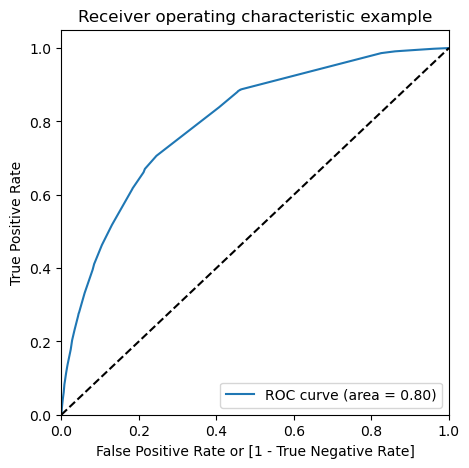

In [118]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final.HeartDisease, y_train_final.HeartDisease_prob)

In [119]:
# checking different probablity cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i] = y_train_final.HeartDisease_prob.map(lambda x:1 if x>i else 0)
y_train_final.head()

,HeartDisease,HeartDisease_prob,Serial Number,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.073298,1,0,7.0,1,0,0,0,0,0,0,0,0,0
1,0,0.030859,2,0,3.0,1,0,0,0,0,0,0,0,0,0
2,0,0.030859,3,0,3.0,1,0,0,0,0,0,0,0,0,0
3,0,0.073298,4,0,7.0,1,0,0,0,0,0,0,0,0,0
4,1,0.210421,5,0,21.0,1,1,1,0,0,0,0,0,0,0


In [120]:
# creating a dataframe with information about probability, accuracy, sensitivity and specificity 

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# tp = confusion[1,1]  true positive 
# tn = confusion[0,0]  true negatives
# fp = confusion[0,1]  false positives
# fn = confusion[1,0]  false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.HeartDisease, y_train_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085242  1.000000  0.000000
0.1   0.1  0.799679  0.616602  0.816739
0.2   0.2  0.871440  0.414894  0.913983
0.3   0.3  0.903460  0.231265  0.966099
0.4   0.4  0.912278  0.130961  0.985086
0.5   0.5  0.915035  0.043444  0.996254
0.6   0.6  0.915088  0.034640  0.997133
0.7   0.7  0.914936  0.010900  0.999180
0.8   0.8  0.914758  0.000000  1.000000
0.9   0.9  0.914758  0.000000  1.000000


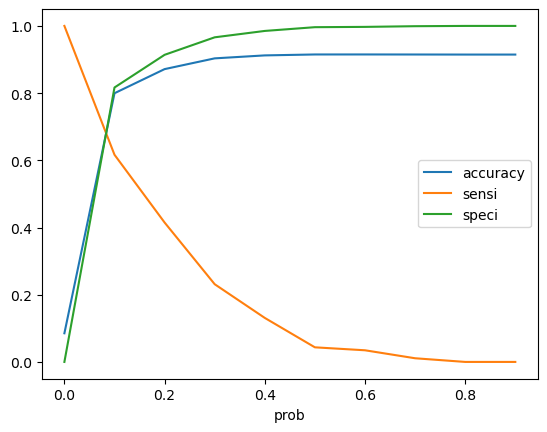

In [121]:
# plotting probability 

cutoff_df.plot.line(x= 'prob', y = ['accuracy','sensi','speci'])
plt.show()

In [122]:
y_train_final['predicted_interns'] = y_train_final.HeartDisease_prob.map(lambda x: 1 if x >0.1 else 0)


In [123]:
y_train_final['predicted_interns'].value_counts()

0    174563
1     49293
Name: predicted_interns, dtype: int64

While marking the cutoff at 0.1, people with heart disease are 49293 which id 22% of the train set. The accuracy of the model is not best but i doesn't miss the people who migh have a heart disease.  

In [124]:
# tarnsforming the continuous features in the test dataset 

final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [125]:
final_test.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,yes_HeartD,yes_Smoking,yes_AlcoholDrinking,yes_DiffWalking,Male,25-29,...,yes_Diabetic,yes_PhysicalActivity,Fair,Good,Poor,Very good,yes_Asthma,yes_KidneyDisease,yes_SkinCancer,yes_Stroke
290281,0.151190,0.0,0.0,0.260870,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
65173,0.388408,0.0,0.0,0.217391,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
58744,0.178035,0.0,0.0,0.217391,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
207715,0.136913,0.0,0.0,0.304348,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
168868,0.192312,0.0,0.0,0.304348,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [126]:
# using the features in the test dataframe that were used to create our model 

x_test = x_test[col]

In [127]:
x_test.head()

,25-29,30-34,35-39,70-74,75-79,80 or older,Fair,Good,Poor,yes_Stroke
290281,1,0,0,0,0,0,0,0,0,0
65173,0,1,0,0,0,0,0,0,0,0
58744,0,0,0,0,0,0,0,0,0,0
207715,0,0,0,0,0,0,0,1,0,0
168868,0,0,0,0,0,0,0,0,0,0


In [128]:
# adding the constant to x_test

x_test_sm = sm.add_constant(x_test)

In [129]:
# creating the predictions based on the model 

y_test_pred = pred.predict(x_test_sm)
y_test_pred[:10]

290281    0.004498
65173     0.006671
58744     0.030859
207715    0.073298
168868    0.030859
204242    0.071047
203703    0.004498
134251    0.007543
225438    0.006671
78082     0.030859
dtype: float64

In [130]:
# creating different columns to store the covert situation and the probability for the same

y_test_final = pd.DataFrame({'HeartDisease' : y_test.values, 'HeartDisease_prob' : y_test_pred})

In [131]:
y_test_final.head()

,HeartDisease,HeartDisease_prob
290281,0,0.004498
65173,0,0.006671
58744,0,0.030859
207715,0,0.073298
168868,0,0.030859


In [132]:
# testing with a cutoff at 0.5 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.HeartDisease_prob.map(lambda x: 1 if x >0.1 else 0)

In [133]:
# creating the confusion matrix 

confusion_one = metrics.confusion_matrix(y_test_final.HeartDisease, y_test_final.predicted)
print(confusion_one)

[[71731 15917]
 [ 3193  5098]]


In [134]:
# the accuracy of the model 

print(metrics.accuracy_score(y_test_final.HeartDisease, y_test_final.predicted))

0.8008109319463409


In [135]:
# true positives
tp1 = confusion_one[1,1] 

#true negatives
tn1 = confusion_one[0,0]

# false positives
fp1 = confusion_one[0,1]

# false negatives
fn1 = confusion_one[1,0]

In [136]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate 

tp1 /(tp1+fn1)

0.6148836087323604

In [137]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn1 /(tn1+fp1)

0.8183985943775101

In [138]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp1 /(tn1+fp1)

0.18160140562248997

1. we have a good model whose accuracy, sensitivity and specificity are closr genrated by the train set on similar cut off
2. We can select different cutoff to increase the accuracy, sensitivity and specificity based on the requirement of the case in context